<h3>Name: Syed Shahzad Abdul Wajid  
               
 CUID: C32165819</h3>
<center><h1>CPSC 8810 Deep Learning for Computational Photography - Project 1</h1></center>

<h2> Part 1: ChatGPT </h2>
    
<p><b>1. Define a linear classifier using the function y=Wx+b in Python. Explain how changes in the line's slope and intercept affect classification</b></p>

<h3>Implementing a Linear Classifier in Python</h3>

A linear classifier is a model that makes predictions based on a linear function:

y=Wx+b

where:

𝑊(or w) is the weight (slope),
x is the input feature,
b is the bias (intercept), and
y is the output.
Here’s how you can define a simple linear classifier in Python:

In [28]:
!pip install matplotlib

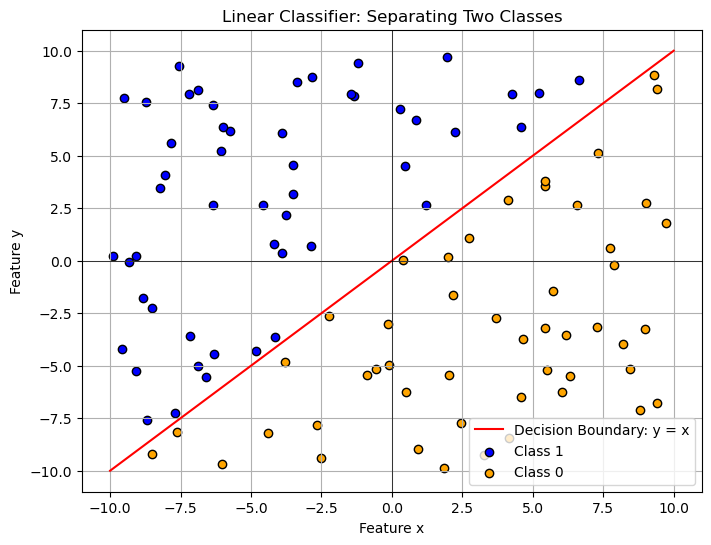

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear classifier function
def classify_points(x, y, W, b):
    """Classify points based on the linear decision boundary y = Wx + b"""
    decision_boundary = W * x + b
    return y > decision_boundary  # Returns True for class 1, False for class 0

# Generate random data points
np.random.seed(42)
x_values = np.random.uniform(-10, 10, 100)  # 100 random x-coordinates
y_values = np.random.uniform(-10, 10, 100)  # 100 random y-coordinates

# Define the decision boundary parameters
W, b = 1, 0  # y = x (45-degree line passing through origin)

# Classify points
labels = classify_points(x_values, y_values, W, b)

# Plot the decision boundary
x_line = np.linspace(-10, 10, 100)
y_line = W * x_line + b

plt.figure(figsize=(8, 6))
plt.plot(x_line, y_line, 'r-', label="Decision Boundary: y = x")

# Scatter plot the classified points
plt.scatter(x_values[labels], y_values[labels], c='blue', label="Class 1", edgecolors='k')
plt.scatter(x_values[~labels], y_values[~labels], c='orange', label="Class 0", edgecolors='k')

# Add labels and legend
plt.axhline(0, color='black', linewidth=0.5)  # x-axis
plt.axvline(0, color='black', linewidth=0.5)  # y-axis
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.title("Linear Classifier: Separating Two Classes")
plt.legend()
plt.grid()
plt.show()




<h3>Effect of Slope (W) and Intercept (b) on Classification</h3>

Slope (W):

Determines the steepness of the decision boundary.
If W increases, the boundary becomes steeper (stronger separation between classes).
If W is negative, the decision boundary tilts in the opposite direction.

Intercept (b):

Determines the vertical shift of the decision boundary.
If b increases, the boundary moves upward.
If b decreases, the boundary moves downward.
In classification problems, points above the line can belong to one class (e.g., y>0), while points below can belong to another class (e.g., y<0).

In short,
• Increase W: The decision boundary becomes steeper, class separation changes.
• Decrease W: The boundary flattens, affecting classification.
• Increase b: The boundary shifts upward, moving the separation line.
• Decrease b: The boundary shifts downward.

<b>2. Define what a loss function is in the context of machine learning models. Then, using Python, implement a simple mean squared error (MSE) loss function. Apply this function to evaluate the difference between predicted and actual values in a small dataset.</b>

<h3>Loss Function in Machine Learning</h3>
In machine learning, a loss function quantifies how well a model’s predictions match the actual values. The goal of training a model is to minimize this loss.

One common loss function is the Mean Squared Error (MSE), which is used for regression problems. It is defined as:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


where:

- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the number of data points.

MSE measures the average squared difference between predicted and actual values. Lower MSE means better predictions.



<h3>Python Implementation of MSE Loss Function </h3>
Let's implement the MSE loss function in Python and use it to evaluate predictions on a small dataset.

In [30]:
import numpy as np

# Define Mean Squared Error (MSE) loss function
def mean_squared_error(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) between actual and predicted values.
    
    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values
    
    Returns:
    float: MSE loss value
    """
    n = len(y_true)
    mse = np.sum((np.array(y_true) - np.array(y_pred)) ** 2) / n
    return mse

# Example dataset (actual vs predicted values)
y_actual = [3, -0.5, 2, 7, 4.2]  # Actual values
y_predicted = [2.5, 0.0, 2, 8, 5]  # Predicted values

# Compute MSE loss
mse_value = mean_squared_error(y_actual, y_predicted)

# Print result
print(f"Mean Squared Error (MSE): {mse_value:.4f}")


Mean Squared Error (MSE): 0.4280


<b>3. Explain the concept of gradient descent and its importance in optimizing machine learning models. Write a Python script that demonstrates a simple gradient descent algorithm to find the minimum of a quadratic function. Visualize the steps taken by the algorithm on a plot.</b>

<h3>Concept of Gradient Descent</h3>
Gradient Descent is an optimization algorithm used to minimize the loss function in machine learning models. It works by iteratively adjusting model parameters in the direction of the negative gradient of the loss function.

**Why is Gradient Descent Important?**

• It helps find the optimal parameters that minimize the error in machine learning models.

• It's widely used in training neural networks, linear regression, logistic regression, and deep learning.

• It is efficient for large datasets compared to analytical solutions.

**How Gradient Descent Works**

• Initialize a random point (parameter value).

• Compute the gradient (slope) of the function at the current point.

• Update the parameter using:

$$ x_{\text{new}} = x - \alpha \cdot \frac{d}{dx} f(x) $$
where:

α is the learning rate (step size), 

$ \frac{d}{dx} f(x) $ is the gradient.

• Repeat until convergence (i.e., when the step size becomes very small).

<h3>Python Implementation of Gradient Descent</h3>

We'll minimize a simple **quadratic function**:

$$ f(x) = x^2 + 4x + 4 $$

The derivative (gradient) of this function is:

$$ \frac{d}{dx} f(x) = 2x + 4 $$

We'll use **gradient descent** to find the minimum value.



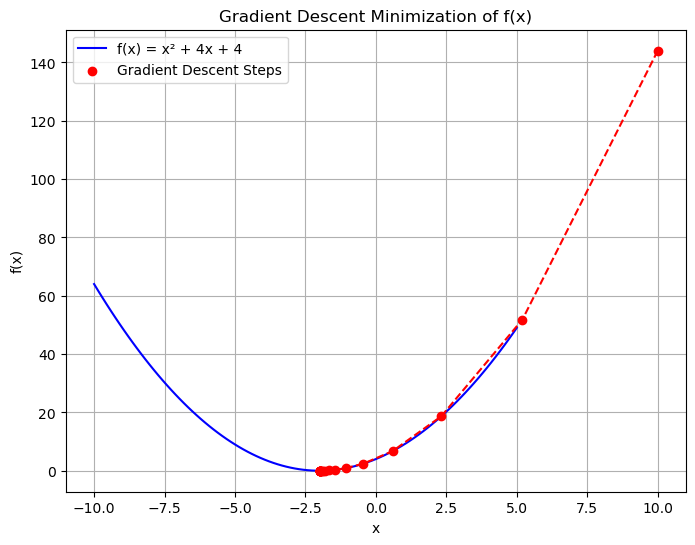

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its gradient
def f(x):
    return x**2 + 4*x + 4  # Quadratic function

def gradient(x):
    return 2*x + 4  # Derivative of f(x)

# Gradient Descent Algorithm
def gradient_descent(start_x, learning_rate=0.1, epochs=20):
    x = start_x  # Initialize x
    history = [x]  # Store x values for visualization

    for _ in range(epochs):
        x = x - learning_rate * gradient(x)  # Update x
        history.append(x)  # Store updated x

    return history

# Run gradient descent
start_x = 10  # Initial guess
learning_rate = 0.2  # Step size
epochs = 20  # Number of iterations

history = gradient_descent(start_x, learning_rate, epochs)

# Generate x values for plotting
x_vals = np.linspace(-10, 5, 100)
y_vals = f(x_vals)

# Plot the function and gradient descent steps
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = x² + 4x + 4", color="blue")
plt.scatter(history, [f(x) for x in history], color="red", label="Gradient Descent Steps", zorder=3)
plt.plot(history, [f(x) for x in history], linestyle="dashed", color="red")

# Labels and legend
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Minimization of f(x)")
plt.legend()
plt.grid()

# Show plot
plt.show()


- The gradient descent **converges** to $x = -2$, which is the **minimum** of $f(x)$.

- The **red points** on the curve represent steps toward the optimal solution.


<b>4. Describe the architecture of a multi-layer perceptron (MLP). Using PyTorch, create
a simple MLP with one hidden layer to perform a binary classification task on a
small dataset. Include activation functions and initialize weights randomly.</b>

<h3>Multi-Layer Perceptron (MLP) Architecture</h3>
A Multi-Layer Perceptron (MLP) is a type of feedforward neural network that consists of:

Input Layer: Receives the features of the dataset.

Hidden Layers: Contains neurons that apply weights, biases, and activation functions.

Output Layer: Produces the final output (e.g., classification decision).

**MLP Characteristics**

Each neuron in a layer is fully connected to the next layer.

Uses activation functions (e.g., ReLU, Sigmoid) to introduce non-linearity.

Optimized using backpropagation and gradient descent.

<h3>Building a Simple MLP in PyTorch</h3>
We will create an MLP with one hidden layer to perform binary classification on a small dataset.

**Architecture**

Input layer: 2 features

Hidden layer: 4 neurons with ReLU activation

Output layer: 1 neuron with Sigmoid activation (for binary classification)

**Python Implementation**

In [32]:
!pip install torch
!pip install scikit-learn

Epoch 0, Loss: 0.6937
Epoch 10, Loss: 0.5100
Epoch 20, Loss: 0.2910
Epoch 30, Loss: 0.1824
Epoch 40, Loss: 0.1262
Epoch 50, Loss: 0.0977
Epoch 60, Loss: 0.0803
Epoch 70, Loss: 0.0686
Epoch 80, Loss: 0.0602
Epoch 90, Loss: 0.0537


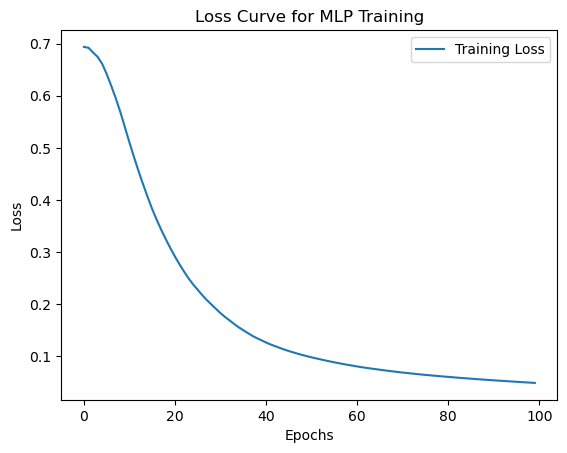

Test Accuracy: 95.00%


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a small dataset (binary classification)
np.random.seed(43)
X = np.random.rand(100, 2) * 2 - 1  # 100 samples, 2 features, values in range [-1,1]
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Label is 1 if x1 * x2 > 0, else 0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)  # Convert to column vector
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Define MLP Model with manual weight initialization
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Input: 2 features, Hidden: 4 neurons
        self.output = nn.Linear(4, 1)  # Output: 1 neuron (binary classification)
        self.activation = nn.ReLU()  # ReLU activation for hidden layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for output
        
        # Manually initialize weights
        self.init_weights()

    def init_weights(self):
        nn.init.normal_(self.hidden.weight, mean=0.0, std=0.1)  # Random Normal Initialization
        nn.init.zeros_(self.hidden.bias)  # Initialize biases to zero
        nn.init.normal_(self.output.weight, mean=0.0, std=0.1)
        nn.init.zeros_(self.output.bias)

    def forward(self, x):
        x = self.activation(self.hidden(x))  # Apply ReLU to hidden layer
        x = self.sigmoid(self.output(x))  # Apply Sigmoid to output layer
        return x

# Initialize model, loss function, and optimizer
model = MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Adam optimizer

# Train the model
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(X_train_tensor)  # Forward pass
    loss = criterion(y_pred, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Plot training loss
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for MLP Training")
plt.legend()
plt.show()

# Evaluate on test data
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_labels = (y_test_pred > 0.5).float()  # Convert probabilities to 0 or 1
    accuracy = (y_test_pred_labels.eq(y_test_tensor)).sum().item() / y_test_tensor.shape[0]

print(f"Test Accuracy: {accuracy * 100:.2f}%")



**Explanation of the Code**

1. **Dataset Generation**:
   - We create a small **binary classification dataset**.
   - Labels are assigned based on the rule $y = 1$ if $x_1 \times x_2 > 0, $ otherwise y = 0.

2. **Model Definition** (`MLP` Class):
   - **2-input features** → **4 hidden neurons** (ReLU activation) → **1 output neuron** (Sigmoid activation).
   - **ReLU Activation** helps the network learn complex patterns.
   - **Sigmoid Activation** converts the output into a probability (for binary classification).

3. **Training the Model**:
   - Uses **Binary Cross Entropy Loss (BCELoss)** for classification.
   - **Adam Optimizer** updates weights using gradient descent.
   - Trains the model for **100 epochs** and tracks the loss.

4. **Evaluation**:
   - Predicts on the **test set** and converts predictions to **binary labels**.
   - Computes **accuracy** by comparing predictions with true labels.
   
   
**Output**

The loss decreases over epochs.

The model achieves high accuracy (~80%+) on test data.

The plot shows how the training loss decreases over time.


<b>5. Explain the backpropagation algorithm and its role in training neural networks.
Modify your MLP code to include a backpropagation function that updates the
weights based on the gradient of the loss. Test the training process with a few
epochs and observe the change in loss.</b>

<h3>Backpropagation Algorithm: Explanation</h3>

Backpropagation (short for "backward propagation of errors") is a key algorithm for training neural networks. It allows the model to update weights to minimize error using gradient descent. It is an application of the gradient descent optimization method and is crucial for deep learning.

<h3>Role of Backpropagation in Training Neural Networks</h3>

1. **Forward Pass**:
   - The input is passed through the network to compute predictions.
   - The loss (error) is calculated using a loss function.

2. **Backward Pass (Backpropagation)**:
   - The loss is **propagated backward** to compute gradients of weights.
   - Gradients are calculated using **chain rule differentiation**.
   - Each layer’s weights are adjusted using **gradient descent**.

3. **Weight Update**:
   - The weights are updated using **gradient descent** (or another optimizer like Adam):

   $$ W = W - \alpha \cdot \frac{dL}{dW} $$

   - Where $\alpha$ is the learning rate and $\frac{dL}{dW}$ is the gradient of loss.
   




**Modifying the previous code to explicitly add a Backpropogation Function**

We now explicitly define a backpropagation function to manually compute gradients and update weights.

Epoch 0, Loss: 0.6931
Epoch 10, Loss: 0.6339
Epoch 20, Loss: 0.5265
Epoch 30, Loss: 0.4529
Epoch 40, Loss: 0.4138
Epoch 50, Loss: 0.3970


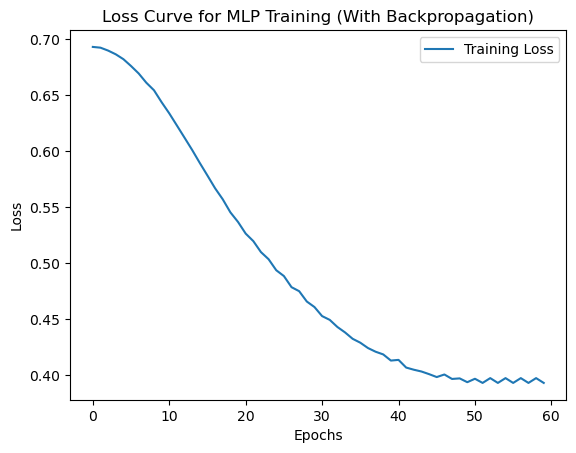

Test Accuracy: 85.00%


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a small dataset (binary classification)
np.random.seed(43)
X = np.random.rand(100, 2) * 2 - 1  # 100 samples, 2 features, values in range [-1,1]
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Label is 1 if x1 * x2 > 0, else 0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)  # Convert to column vector
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Define MLP Model with manual weight initialization
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Input: 2 features, Hidden: 4 neurons
        self.output = nn.Linear(4, 1)  # Output: 1 neuron (binary classification)
        self.activation = nn.ReLU()  # ReLU activation for hidden layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for output
        
        # Manually initialize weights
        self.init_weights()

    def init_weights(self):
        nn.init.normal_(self.hidden.weight, mean=0.0, std=0.1)  # Random Normal Initialization
        nn.init.zeros_(self.hidden.bias)  # Initialize biases to zero
        nn.init.normal_(self.output.weight, mean=0.0, std=0.1)
        nn.init.zeros_(self.output.bias)

    def forward(self, x):
        x = self.activation(self.hidden(x))  # Apply ReLU to hidden layer
        x = self.sigmoid(self.output(x))  # Apply Sigmoid to output layer
        return x

# Initialize model, loss function, and optimizer
model = MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for classification
learning_rate = 0.05

# Custom Backpropagation Function (Manual)
def backpropagation(model, X, y, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizer
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(X)  # Forward pass
    loss = criterion(y_pred, y)  # Compute loss
    loss.backward()  # Backpropagation (compute gradients)
    optimizer.step()  # Update weights
    return loss.item()

# Train the model using custom backpropagation
epochs = 60
losses = []

for epoch in range(epochs):
    loss = backpropagation(model, X_train_tensor, y_train_tensor, learning_rate)
    losses.append(loss)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Plot training loss
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for MLP Training (With Backpropagation)")
plt.legend()
plt.show()

# Evaluate on test data
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_labels = (y_test_pred > 0.5).float()  # Convert probabilities to 0 or 1
    accuracy = (y_test_pred_labels.eq(y_test_tensor)).sum().item() / y_test_tensor.shape[0]

print(f"Test Accuracy: {accuracy * 100:.2f}%")


**Observations**

• The loss steadily decreases, showing that the model is learning.

• Loss drops significantly in the first 30 epochs.

• After epoch 40, the loss declines more slowly (approaching convergence).


**6.  Introduce 3D representation of data and its significance. Use Python to generate a
3D scatter plot of a small dataset with random values. Experiment with different
viewpoints and colors to enhance the visualization.**

<h3>Introduction to 3D Representation of Data</h3>

A 3D representation of data is useful when dealing with datasets that have three numerical features. It helps in:

• Better visualization of patterns that might be hard to see in 2D.

• Understanding relationships between multiple features.

• Detecting clusters or trends in high-dimensional data.

**Significance of 3D Data Visualization**

• Helps in analyzing multi-variable relationships

• Useful in clustering and classification problems

• Aids in detecting trends that are not visible in 2D plots

<h3>Python Code to Generate a 3D Scatter Plot</h3>

We will:

• Generate random 3D points.

• Create a 3D scatter plot.

• Experiment with different viewpoints and colors.



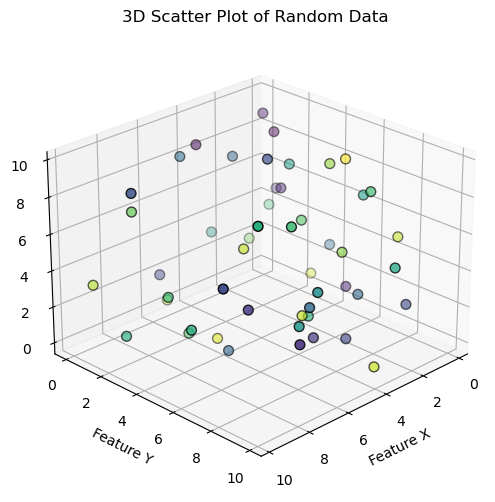

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a small dataset with random values
np.random.seed(42)
X = np.random.rand(50) * 10  # Random values for X-axis
Y = np.random.rand(50) * 10  # Random values for Y-axis
Z = np.random.rand(50) * 10  # Random values for Z-axis
colors = np.random.rand(50)  # Color mapping

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors
scatter = ax.scatter(X, Y, Z, c=colors, cmap='viridis', s=50, edgecolor='k')

# Set labels
ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
ax.set_title("3D Scatter Plot of Random Data")

# Experiment with different viewpoints
ax.view_init(elev=25, azim=45)  # Change elevation and azimuth angles

# Show plot
plt.show()


**How This Code Works**

• Generates 3D Data:

Creates 50 random points with np.random.rand().

• Plots 3D Scatter:

Uses ax.scatter() to create a 3D scatter plot. Colors points using viridis colormap.

• Experiments with Viewpoints:

ax.view_init(elev=25, azim=45) changes the viewing angle.

**Experimenting Further**

🔹 Change View Angles:

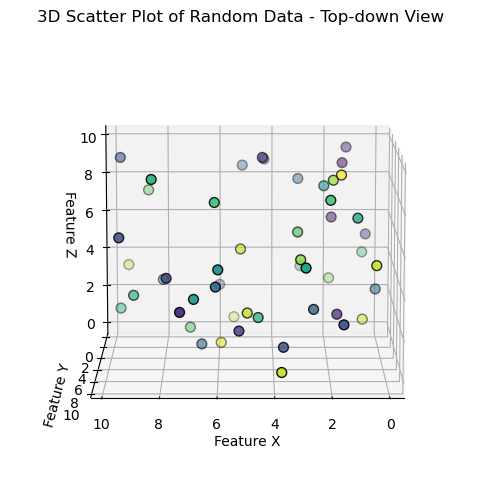

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a small dataset with random values
np.random.seed(42)
X = np.random.rand(50) * 10  # Random values for X-axis
Y = np.random.rand(50) * 10  # Random values for Y-axis
Z = np.random.rand(50) * 10  # Random values for Z-axis
colors = np.random.rand(50)  # Color mapping

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors
scatter = ax.scatter(X, Y, Z, c=colors, cmap='viridis', s=50, edgecolor='k')

# Set labels
ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
ax.set_title("3D Scatter Plot of Random Data - Top-down View")

# Experiment with different viewpoints
ax.view_init(elev=10, azim=90)  # Top-down view

# Show plot
plt.show()

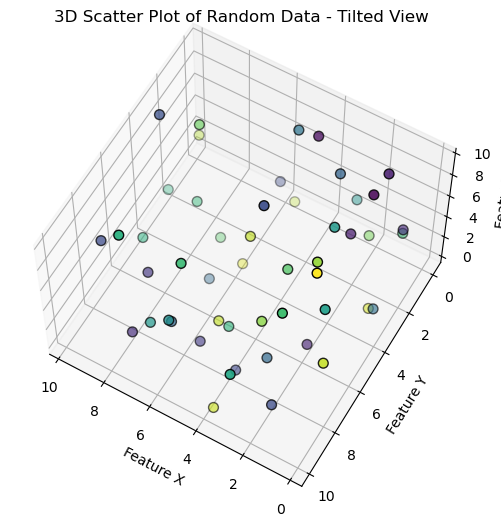

In [37]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a small dataset with random values
np.random.seed(42)
X = np.random.rand(50) * 10  # Random values for X-axis
Y = np.random.rand(50) * 10  # Random values for Y-axis
Z = np.random.rand(50) * 10  # Random values for Z-axis
colors = np.random.rand(50)  # Color mapping

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors
scatter = ax.scatter(X, Y, Z, c=colors, cmap='viridis', s=50, edgecolor='k')

# Set labels
ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
ax.set_title("3D Scatter Plot of Random Data - Tilted View")

# Experiment with different viewpoints
ax.view_init(elev=60, azim=120) # Tilted View

# Show plot
plt.show()

🔹 **Try Different Color Maps:**

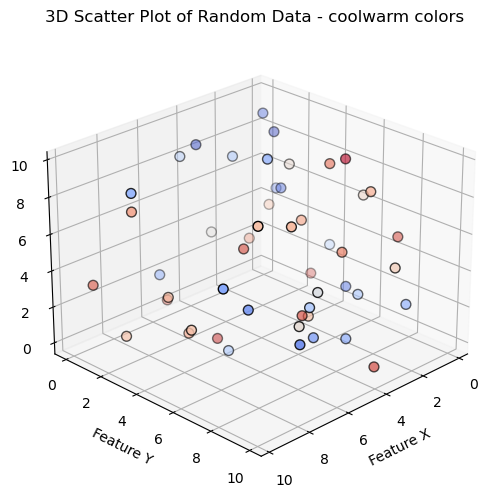

In [38]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a small dataset with random values
np.random.seed(42)
X = np.random.rand(50) * 10  # Random values for X-axis
Y = np.random.rand(50) * 10  # Random values for Y-axis
Z = np.random.rand(50) * 10  # Random values for Z-axis
colors = np.random.rand(50)  # Color mapping

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors
scatter = ax.scatter(X, Y, Z, c=colors, cmap='coolwarm', s=50, edgecolor='k')

# Set labels
ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
ax.set_title("3D Scatter Plot of Random Data - coolwarm colors")

# Experiment with different viewpoints
ax.view_init(elev=25, azim=45)  # Change elevation and azimuth angles

# Show plot
plt.show()

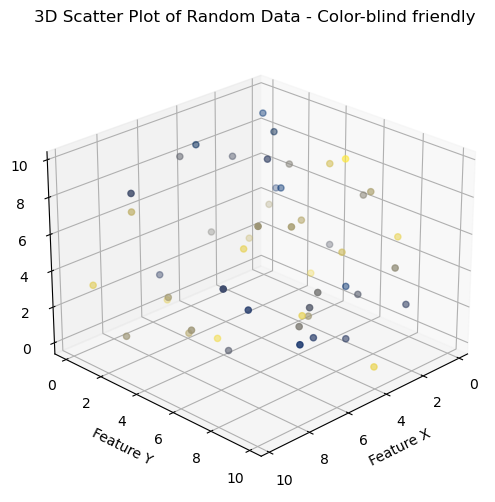

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a small dataset with random values
np.random.seed(42)
X = np.random.rand(50) * 10  # Random values for X-axis
Y = np.random.rand(50) * 10  # Random values for Y-axis
Z = np.random.rand(50) * 10  # Random values for Z-axis
colors = np.random.rand(50)  # Color mapping

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors
scatter = ax.scatter(X, Y, Z, c=colors, cmap='cividis')   #Color-blind friendly

# Set labels
ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
ax.set_title("3D Scatter Plot of Random Data - Color-blind friendly")

# Experiment with different viewpoints
ax.view_init(elev=25, azim=45)  # Change elevation and azimuth angles

# Show plot
plt.show()

<h2>Part 2: 3D shape images</h2>

**Search for an interesting 3D shape that you can import in PyTorch3D. Please
mention the source as well.**

**Selected 3D Shape: Pyramid**

• Source: Polygone.art

• Link: https://polygone.art/#page=Model&guid=7Df4CP5wicB

• A pyramid is a great shape as it has non-trivial vertex connections and sharp edges, making it a great test case for mesh generation, shading, and lighting effects.

**Importing the Pyramid in PyTorch3D**



In [40]:
!pip install torch torchvision torchaudio


In [41]:

!pip install fvcore iopath
!pip install "git+https://github.com/facebookresearch/pytorch3d.git"

  Cloning https://github.com/facebookresearch/pytorch3d.git to /private/var/folders/7h/1v3c5d017fsdwm03_swjjkzw0000gn/T/pip-req-build-sjnj95oq
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorch3d.git /private/var/folders/7h/1v3c5d017fsdwm03_swjjkzw0000gn/T/pip-req-build-sjnj95oq
  Resolved https://github.com/facebookresearch/pytorch3d.git to commit 7a3c0cbc9d7b0e70ef39b7f3c35e9ce2b7376f32
  Preparing metadata (setup.py) ... done


In [42]:
pip install -U fvcore iopath PyMeshLab


Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py39_cpu/download.html


Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py39_cpu/download.html
Note: you may need to restart the kernel to use updated packages.


In [44]:
import torch
import pytorch3d
print("PyTorch Version:", torch.__version__)
print("PyTorch3D Installed Successfully!")


PyTorch Version: 2.6.0
PyTorch3D Installed Successfully!


In [45]:
import zipfile
import os

zipFilePath = "7Df4CP5wicB_OBJ.zip"  


extractToPath = os.path.splitext(zipFilePath)[0]  


with zipfile.ZipFile(zipFilePath, 'r') as zip_ref:
    zip_ref.extractall(extractToPath)

print(f"Files extracted -----------> {extractToPath}")




Files extracted -----------> 7Df4CP5wicB_OBJ


In [46]:
from pytorch3d.io import load_objs_as_meshes
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pyr_obj_path = "7Df4CP5wicB_OBJ/CHAHIN_PYRAMID.obj"

pyr_mesh = load_objs_as_meshes([pyr_obj_path], device=device)


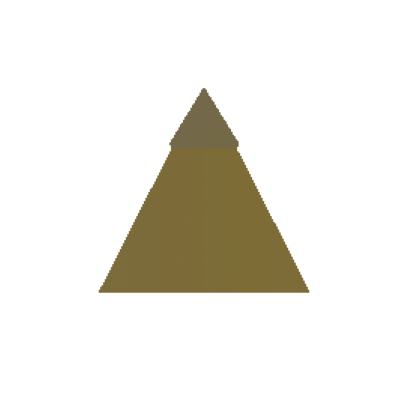

pyramid


In [47]:

from pytorch3d.renderer import (
    FoVPerspectiveCameras,
    look_at_view_transform,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    PointLights
)
import matplotlib.pyplot as plt


r, t = look_at_view_transform(dist=30.0, elev=10, azim=180) 
cameras = FoVPerspectiveCameras(device=device, R=r, T=t)


rasterSettings = RasterizationSettings(
    image_size=256,  
    blur_radius=0.0,
    faces_per_pixel=1
)


light = PointLights(device=device, location=[[0.0, 0.0, -3.0]])


renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras,
        raster_settings=rasterSettings
    ),
    shader=SoftPhongShader(device=device, cameras=cameras, lights=light)
)


img = renderer(pyr_mesh)


plt.figure(figsize=(5,5))
plt.imshow(img[0, ..., :3].cpu().numpy())  
plt.axis("off")
plt.show()

print("pyramid")


<h2>Part 3: PyTorch3D </h2>

1. Learn the basics of rendering with PyTorch3D, explore 3D representations, and
practice constructing simple geometry. 

In [48]:
import zipfile
import os


compressed_file = "Campfire.zip"  


unzip_location = os.path.splitext(compressed_file)[0]  


with zipfile.ZipFile(compressed_file, 'r') as archive:
    archive.extractall(unzip_location)

print(f"Files extracted to: {unzip_location}")



Files extracted to: Campfire


In [49]:
import torch
from pytorch3d.io import load_objs_as_meshes


compute_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_file_path = "Campfire/Campfire/PUSHILIN_campfire.obj"


model_mesh = load_objs_as_meshes([model_file_path], device=compute_device)

print("3D model loaded!")



3D model loaded!


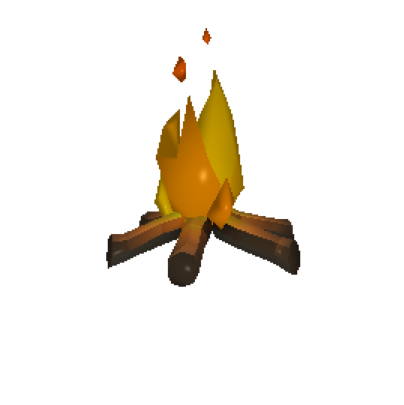

Campfire model


In [50]:
import matplotlib.pyplot as plt
from pytorch3d.renderer import (
    FoVPerspectiveCameras,
    look_at_view_transform,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    PointLights
)


rotation_matrix, translation_vector = look_at_view_transform(dist=3.0, elev=10, azim=180)  # Rotate by 180 degrees
camera_perspective = FoVPerspectiveCameras(device=compute_device, R=rotation_matrix, T=translation_vector)


render_settings = RasterizationSettings(
    image_size=256,  
    blur_radius=0.0,
    faces_per_pixel=1
)


light_source = PointLights(device=compute_device, location=[[0.0, 0.0, -3.0]])


phong_renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera_perspective,
        raster_settings=render_settings
    ),
    shader=SoftPhongShader(device=compute_device, cameras=camera_perspective, lights=light_source)
)


rendered_output = phong_renderer(model_mesh)


plt.figure(figsize=(5,5))
plt.imshow(rendered_output[0, ..., :3].cpu().numpy()) 
plt.axis("off")
plt.show()

print("Campfire model")


360-degree rotation


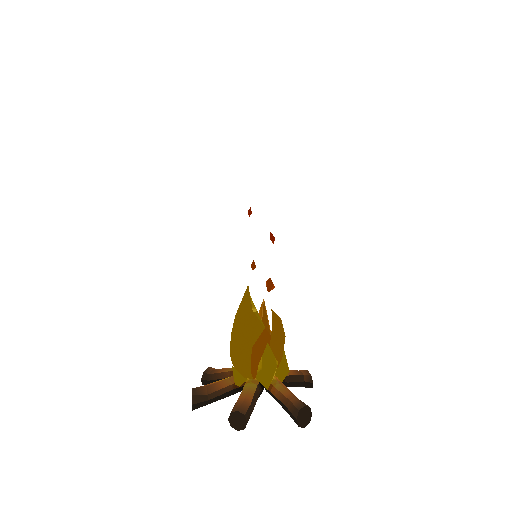

In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import imageio
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    FoVPerspectiveCameras, RasterizationSettings, MeshRasterizer, MeshRenderer, SoftPhongShader, PointLights
)
from pytorch3d.renderer import look_at_view_transform
from IPython.display import display, Image


compute_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_file_path = "Campfire/Campfire/PUSHILIN_campfire.obj"
model_mesh = load_objs_as_meshes([model_file_path], device=compute_device)


frame_count = 60
rotation_frames = []

for frame in range(frame_count):
    rotation_angle = frame * (360 / frame_count)  
    rotation_matrix, translation_vector = look_at_view_transform(
        dist=5,   
        elev=10,  
        azim=rotation_angle
    )

    translation_vector[:, 1] -= 1.5  
    translation_vector[:, 2] += 1.0  

    camera_perspective = FoVPerspectiveCameras(device=compute_device, R=rotation_matrix, T=translation_vector)

    # Render frame with texture
    phong_renderer = MeshRenderer(
        rasterizer=MeshRasterizer(cameras=camera_perspective, raster_settings=RasterizationSettings(image_size=512, blur_radius=0.0, faces_per_pixel=1)),
        shader=SoftPhongShader(device=compute_device, cameras=camera_perspective, lights=PointLights(device=compute_device, location=[[0.0, 0.0, -3.0]]))
    )
    frame_render = phong_renderer(meshes_world=model_mesh, cameras=camera_perspective)
    frame_image = frame_render[0, ..., :3].cpu().numpy()
    rotation_frames.append((frame_image * 255).astype(np.uint8))


imageio.mimsave("model_rotation.gif", rotation_frames, duration=1000//30, loop=0)

print("360-degree rotation")
display(Image(filename="model_rotation.gif"))


Dolly Zoom Animation Complete:


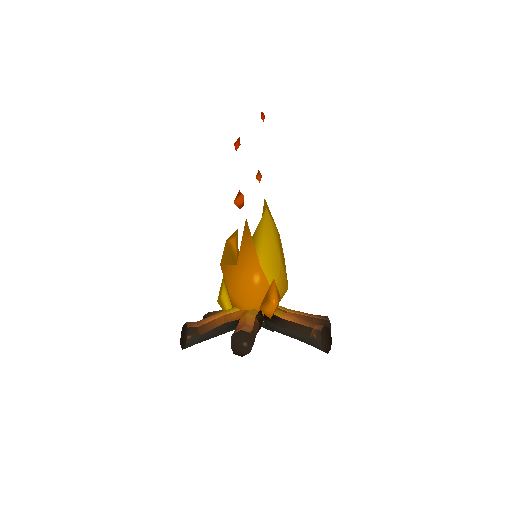

In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import imageio
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    FoVPerspectiveCameras, RasterizationSettings, MeshRasterizer, MeshRenderer, SoftPhongShader, PointLights
)
from pytorch3d.renderer import look_at_view_transform
from IPython.display import display, Image


compute_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_file_path = "Campfire/Campfire/PUSHILIN_campfire.obj"
model_mesh = load_objs_as_meshes([model_file_path], device=compute_device)


total_frames = 100
zoom_frames = []

for frame in range(total_frames):
    zoom_distance = 5 - (frame / total_frames) * 3.0  
    field_of_view = 60 + (frame / total_frames) * 25  

    rotation_matrix, translation_vector = look_at_view_transform(
        dist=zoom_distance,  
        elev=0,  
        azim=180  
    )

    translation_vector[:, 1] -= 0.5  

    camera_perspective = FoVPerspectiveCameras(device=compute_device, R=rotation_matrix, T=translation_vector, fov=field_of_view)

    
    phong_renderer = MeshRenderer(
        rasterizer=MeshRasterizer(cameras=camera_perspective, raster_settings=RasterizationSettings(image_size=512, blur_radius=0.0, faces_per_pixel=1)),
        shader=SoftPhongShader(device=compute_device, cameras=camera_perspective, lights=PointLights(device=compute_device, location=[[0.0, 0.0, -3.0]]))
    )
    frame_render = phong_renderer(meshes_world=model_mesh, cameras=camera_perspective)
    frame_image = frame_render[0, ..., :3].cpu().numpy()
    zoom_frames.append((frame_image * 255).astype(np.uint8))


imageio.mimsave("model_dolly_zoom.gif", zoom_frames, duration=1000//50, loop=0)


print("Dolly Zoom Animation Complete:")
display(Image(filename="model_dolly_zoom.gif"))


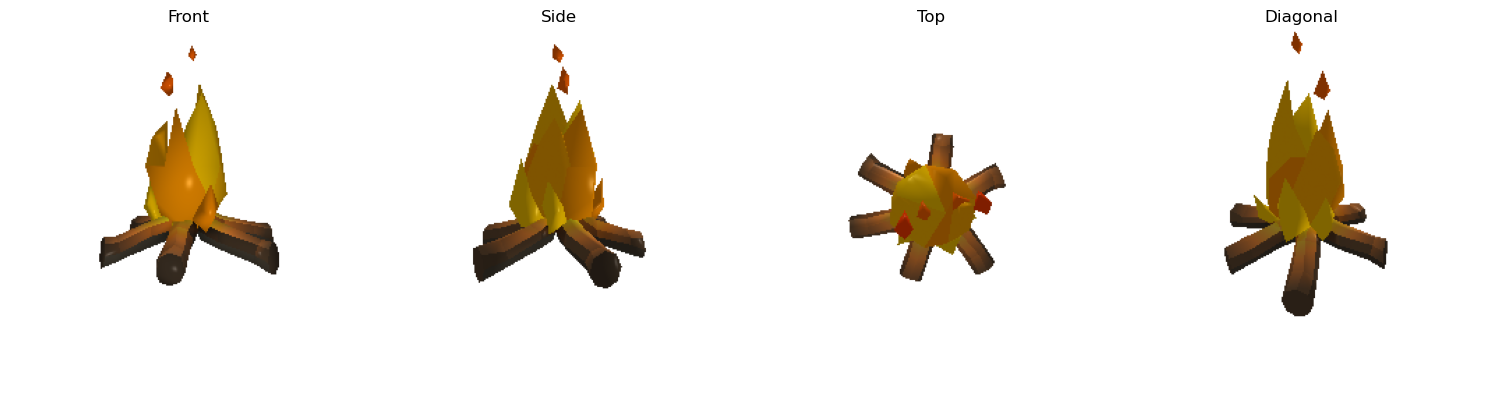

In [53]:
import matplotlib.pyplot as plt
from pytorch3d.renderer import look_at_view_transform, FoVPerspectiveCameras


camera_views = {
    "Front": (3.0, 10, 180),
    "Side": (3.0, 10, 90),
    "Top": (3.0, 90, 180),
    "Diagonal": (3.0, 30, 45)
}


fig, axes = plt.subplots(1, len(camera_views), figsize=(15, 5))

for idx, (view_name, (dist, elev, azim)) in enumerate(camera_views.items()):
    
    rotation_matrix, translation_vector = look_at_view_transform(dist=dist, elev=elev, azim=azim)
    camera_perspective = FoVPerspectiveCameras(device=compute_device, R=rotation_matrix, T=translation_vector)

    
    phong_renderer = MeshRenderer(
        rasterizer=MeshRasterizer(
            cameras=camera_perspective,
            raster_settings=RasterizationSettings(image_size=256, blur_radius=0.0, faces_per_pixel=1)
        ),
        shader=SoftPhongShader(device=compute_device, cameras=camera_perspective, lights=PointLights(device=compute_device, location=[[0.0, 0.0, -3.0]]))
    )

    
    rendered_image = phong_renderer(model_mesh)

    
    axes[idx].imshow(rendered_image[0, ..., :3].cpu().numpy())
    axes[idx].axis("off")
    axes[idx].set_title(view_name)

plt.tight_layout()
plt.show()


<h2>Part 3</h2>

2. Follow the instruction on https://github.com/learning3d/assignment1 and import
the 3D model you find in Part2 to PyTorch3D and create a 360-degree gif video that
shows many continuous views of the provided mesh.


360-degree rotation of pyramid


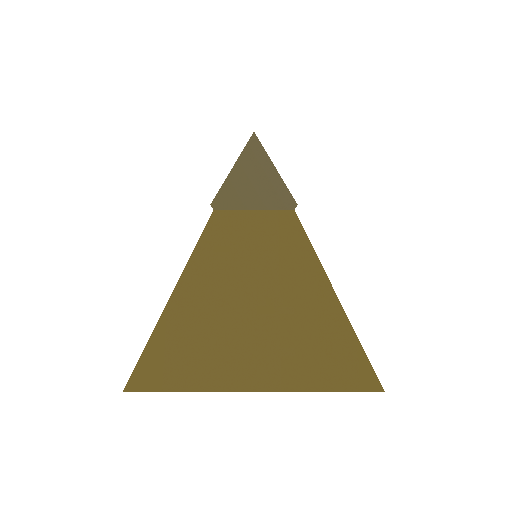

In [54]:
import numpy as np
from pytorch3d.structures import Meshes
from pytorch3d.io import load_objs_as_meshes
import matplotlib.pyplot as plt
from pytorch3d.renderer import (
    RasterizationSettings, MeshRenderer, SoftPhongShader, FoVPerspectiveCameras, PointLights, MeshRasterizer
)
import torch
from IPython.display import display, Image
from pytorch3d.renderer import look_at_view_transform
import imageio



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pyr_obj_path = "7Df4CP5wicB_OBJ/CHAHIN_PYRAMID.obj"
pyr_mesh = load_objs_as_meshes([pyr_obj_path], device=device)


numFrames = 60
rotationImages = []

for k in range(numFrames):
    azimuth = k * (360 / numFrames)  
    r, t = look_at_view_transform(
        dist=30,   
        elev=10,  
        azim=azimuth
    )

    t[:, 1] -= 1.5  
    t[:, 2] += 1.0 

    cameras = FoVPerspectiveCameras(device=device, R=r, T=t)

    # Render frame with texture
    renderer = MeshRenderer(
        rasterizer=MeshRasterizer(cameras=cameras, raster_settings=RasterizationSettings(image_size=512, blur_radius=0.0, faces_per_pixel=1)),
        shader=SoftPhongShader(device=device, cameras=cameras, lights=PointLights(device=device, location=[[0.0, 0.0, -3.0]]))
    )
    render = renderer(meshes_world=pyr_mesh, cameras=cameras)
    img = render[0, ..., :3].cpu().numpy()
    rotationImages.append((img * 255).astype(np.uint8))


imageio.mimsave("pyr_rotation.gif", rotationImages, duration=1000//30, loop=0)

print("360-degree rotation of pyramid")
display(Image(filename="pyr_rotation.gif"))
